In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Class: MCS, Probability: 0.978


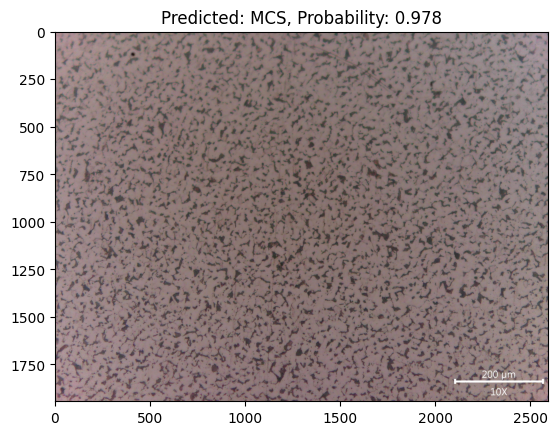

In [ ]:

class_labels = ['HCS', 'LCS', 'MCS']

model_path = '/content/drive/My Drive/THESIS S2/model_EfnetB5_MIX_75_98.h5'
model = load_model(model_path)

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(456, 456))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

image_path = '/content/drive/My Drive/Data_training/test/MCS_12_10X_T2.jpg'
processed_image = load_and_preprocess_image(image_path)

predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_probability = np.max(predictions)


predicted_class_label = class_labels[predicted_class_index]

print(f'Predicted Class: {predicted_class_label}, Probability: {predicted_probability:.3f}')

img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}, Probability: {predicted_probability:.3f}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediksi di Atas Treshold
Predicted Class: LCS, Probability: 1.000
Class: HCS, Probability: 0.000
Class: LCS, Probability: 1.000
Class: MCS, Probability: 0.000


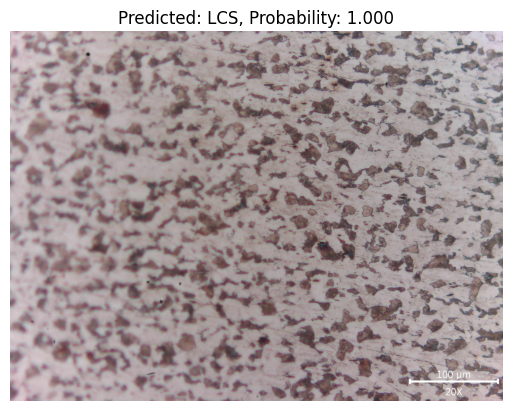

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input


class_labels = ['HCS', 'LCS', 'MCS']


model_path = '/content/drive/My Drive/THESIS S2/model_EfnetB5_MIX_75_98.h5'
model = load_model(model_path)

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(456, 456))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)


image_path = '/content/drive/My Drive/Data_training/test/LCS_4_20X_T2.jpg'
processed_image = load_and_preprocess_image(image_path)

predictions = model.predict(processed_image)


predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_probabilities = predictions[0]
predicted_probability = np.max(predicted_probabilities)


predicted_class_label = class_labels[predicted_class_index]


confidence_threshold = 0.98


if predicted_probability < confidence_threshold:
    print('Prediksi di bawa Treshold')
else:
    print('Prediksi di Atas Treshold')
    print(f'Predicted Class: {predicted_class_label}, Probability: {predicted_probability:.3f}')


for i, label in enumerate(class_labels):
    print(f'Class: {label}, Probability: {predicted_probabilities[i]:.3f}')


img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}, Probability: {predicted_probability:.3f}')
plt.axis('off')
plt.show()